# Extinction Curves with mean and std

## Import modules

In [1]:
import numpy as np
from astropy.modeling.models import BlackBody
import astropy.units as u
import matplotlib.pyplot as plt
from dust_extinction.parameter_averages import G23
from dust_extinction.parameter_averages import F19
from dust_extinction.parameter_averages import F99
import sncosmo
import pandas as pd
from bayesn import SEDmodel

##Second program
import extinction
import pickle

## Load for a spceific SN the relevant data

Supernova details

In [2]:
supernova_name = "sn2006X"
supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"

## Define wavelengths and range

In [3]:
wavelengths = np.logspace(np.log10(0.1), np.log10(10), num=1000)*u.micron
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
spectrum = bb_lam(wavelengths)

In [4]:
dust_law = "G23"
sampleChainsDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_chains.pkl"

with open(sampleChainsDir, 'rb') as file:
    chains = pickle.load(file)

RV_from_chains_G23 = np.reshape(chains['RV'], 1000)
AV_from_chains_G23 = np.reshape(chains['AV'], 1000)

extAVG23 = np.zeros([len(RV_from_chains_G23), 1000])
for i in np.arange(len(RV_from_chains_G23)):
    RV_G23 = RV_from_chains_G23[i]
    RV_G23 = np.reshape(RV_G23, 1)
    extG23 = G23(Rv=RV_G23)
    extAVG23[i,:] = AV_from_chains_G23[i]*extG23(wavelengths)
print(extAVG23)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


[[26.70510072 26.39589862 26.09161664 ...  0.07480175  0.07433748
   0.07354567]
 [26.56054817 26.25373904 25.95181374 ...  0.08014466  0.07965153
   0.07882174]
 [26.36068843 26.05645771 25.75707045 ...  0.08169731  0.08119613
   0.08035673]
 ...
 [24.72578975 24.44430318 24.16730765 ...  0.1076007   0.10696156
   0.10594645]
 [24.87479126 24.59136254 24.31245524 ...  0.10628445  0.10565218
   0.10464541]
 [24.66180625 24.38147897 24.10562533 ...  0.11076541  0.11010913
   0.10907133]]


In [5]:
dust_law = "F19"
sampleChainsDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_chains.pkl"

with open(sampleChainsDir, 'rb') as file:
    chains = pickle.load(file)

RV_from_chains_F19 = np.reshape(chains['RV'], 1000)
AV_from_chains_F19 = np.reshape(chains['AV'], 1000)

extAVF19 = np.zeros([len(RV_from_chains_F19), 1000])
for i in np.arange(len(RV_from_chains_F19)):
    RV_F19 = RV_from_chains_F19[i]
    RV_F19 = np.reshape(RV_F19, 1)
    extF19 = F19(Rv=RV_F19)
    extAVF19[i,:] = AV_from_chains_F19[i]*extF19(wavelengths)
print(extAVF19)

[[ 2.26570178e+01  2.23987292e+01  2.21466794e+01 ... -2.13841420e-02
  -2.11292903e-02 -2.08736712e-02]
 [ 2.21054119e+01  2.18590819e+01  2.16184732e+01 ... -1.85002815e-02
  -1.82582189e-02 -1.80153590e-02]
 [ 2.27147053e+01  2.24574506e+01  2.22063414e+01 ... -2.07336158e-02
  -2.04800794e-02 -2.02257592e-02]
 ...
 [ 2.20263142e+01  2.17792734e+01  2.15380362e+01 ... -1.90976418e-02
  -1.88545966e-02 -1.86107704e-02]
 [ 2.17771185e+01  2.15373252e+01  2.13029826e+01 ... -1.70258797e-02
  -1.67907546e-02 -1.65548192e-02]
 [ 2.15494548e+01  2.13149636e+01  2.10856859e+01 ... -1.56828943e-02
  -1.54534731e-02 -1.52232262e-02]]


In [6]:
dust_law = "F99"
sampleChainsDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_chains.pkl"

with open(sampleChainsDir, 'rb') as file:
    chains = pickle.load(file)

RV_from_chains_F99 = np.reshape(chains['RV'], 1000)
AV_from_chains_F99 = np.reshape(chains['AV'], 1000)

extAVF99 = np.zeros([len(RV_from_chains_F99), 1000])
for i in np.arange(len(RV_from_chains_F99)):
    RV_F99 = RV_from_chains_F99[i]
    RV_F99 = np.reshape(RV_F99, 1)
    extF99 = F99(Rv=RV_F99)
    extAVF99[i,:] = AV_from_chains_F99[i]*extF99(wavelengths)
print(extAVF99)

[[24.22087061 23.97204553 23.7269674  ...  0.03125403  0.03106031
   0.03086791]
 [23.69597654 23.45193284 23.21158178 ...  0.03187193  0.0316767
   0.03148279]
 [22.92303086 22.68545967 22.45152735 ...  0.03418942  0.03398584
   0.0337836 ]
 ...
 [22.62938627 22.39481941 22.16384658 ...  0.03384352  0.03364215
   0.0334421 ]
 [24.12079843 23.8727786  23.62850002 ...  0.03159204  0.03139706
   0.03120341]
 [20.82203093 20.60381961 20.3890264  ...  0.03728091  0.03706895
   0.03685833]]


## Getting data in each band to plot underneath the graph

In [7]:
#Sorting out frequency in each band
band_names = ["U", "B", "G", "g", "V", "R", "r", "I","i","z", "Z", "Y", "J", "H", "K", "L", "M", "N", "Q"]
mean_wavelength_per_band = [365, 445, 464, 464, 551, 658, 658, 806, 806, 893.2, 900, 1020, 1220, 1630, 2190, 3450, 4750, 10500, 21000]
print(len(band_names))
print(len(mean_wavelength_per_band))
data = {"Band": band_names,
  "Wavelength": mean_wavelength_per_band,
       "Frequency":np.zeros(len(band_names))}
band_wavelengths = pd.DataFrame(data)
print(band_wavelengths)

19
19
   Band  Wavelength  Frequency
0     U       365.0        0.0
1     B       445.0        0.0
2     G       464.0        0.0
3     g       464.0        0.0
4     V       551.0        0.0
5     R       658.0        0.0
6     r       658.0        0.0
7     I       806.0        0.0
8     i       806.0        0.0
9     z       893.2        0.0
10    Z       900.0        0.0
11    Y      1020.0        0.0
12    J      1220.0        0.0
13    H      1630.0        0.0
14    K      2190.0        0.0
15    L      3450.0        0.0
16    M      4750.0        0.0
17    N     10500.0        0.0
18    Q     21000.0        0.0


In [8]:
supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
lcdata = lcdata['OBS'].to_pandas()
bands = np.unique(lcdata['FLT'])
for i, entry in lcdata.iterrows():
    entry_band = entry.FLT
    if entry_band[0] in band_names:
        entry_band_index =  band_names.index(entry_band[0])
        band_wavelengths.at[entry_band_index, 'Frequency'] = band_wavelengths.at[entry_band_index, 'Frequency'] + 1
    else:
        print(entry_band + " Not in our list")
print(band_wavelengths)

u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
u_CSP Not in our list
   Band  Wavelength  Frequency
0     U       365.0        0.0
1     B       445.0       35.0
2     G       464.0        0.0
3     g       464.0       34.0
4     V       551.0       36.0
5     R       658.0        0.0
6     r       658.0       33.0
7     I       806.0        0.0
8     i       806.0       34.0
9     z       893.2        0.0
10    Z       900.0        0.0
11    Y      1020.0       39.0
12    J      1220.0       40.0
13    H      1630.0       42.0
14    K      2190.0        0.0
15    L      3450.0        0.0
16    M      4750.0        0.0
17    N     10500.0     

## Plot the graph

In [9]:
#Get the mean and std for the range
extAVG23_mean = np.mean(extAVG23, axis=0)
extAVG23_std = np.std(extAVG23, axis=0)
extAVF19_mean = np.mean(extAVF19, axis=0)
extAVF19_std = np.std(extAVF19, axis=0)
extAVF99_mean = np.mean(extAVF99, axis=0)
extAVF99_std = np.std(extAVF99, axis=0)

/tmp/ipykernel_15478/1821473329.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


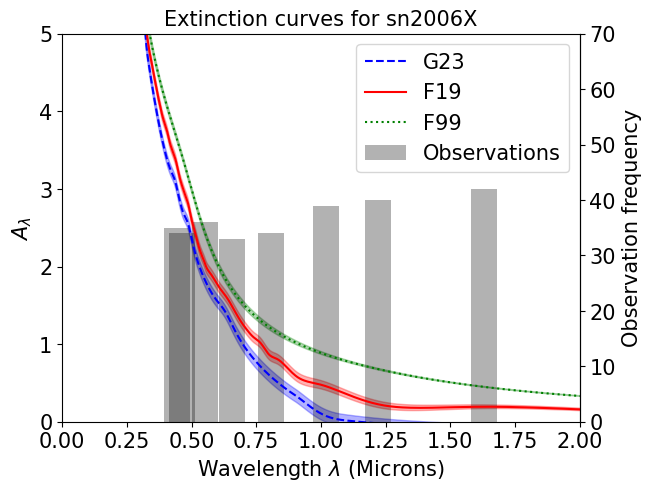

In [13]:
fig, ax = plt.subplots(layout='constrained')

ax.set_xlabel(rf'Wavelength $\lambda$ (Microns)',fontsize = 15)
ax.set_ylabel(rf'$A_\lambda$',fontsize = 15)
ax.set_title('Extinction curves for '+ supernova_name,fontsize = 15)
ax.plot(wavelengths, extAVG23_mean, '--b', label = rf"G23")
ax.plot(wavelengths, extAVF19_mean, '-r' ,label = rf"F19")
ax.plot(wavelengths, extAVF99_mean,  ':g', label = rf"F99")

ax.fill_between(wavelengths, extAVG23_mean-extAVG23_std, extAVG23_mean+extAVG23_std, interpolate = True, alpha=0.3, color="b")
ax.fill_between(wavelengths, extAVF19_mean-extAVF19_std, extAVF19_mean+extAVF19_std, interpolate = True, alpha=0.3, color="r")
ax.fill_between(wavelengths, extAVF99_mean-extAVF99_std, extAVF99_mean+extAVF99_std, interpolate = True, alpha=0.3, color="g")

x_1 = np.linspace(0, 20, 1000)
#ax.plot(x_1-x_1+0.5,x_1, 'y')
#ax.plot(x_1-x_1+0.7,x_1, 'y', label = "V band region 0.5-0.7 microns")

ratio = 14
ax.bar(band_wavelengths["Wavelength"]/1000, band_wavelengths["Frequency"]/ratio, width=0.1, bottom=None, align='center', color = 'k', alpha = .3, label = "Observations")

def A_to_frequency(x):
    return x*ratio

def frequency_to_A(x):
    return x/ratio

secax_y = ax.secondary_yaxis('right', functions=(A_to_frequency, frequency_to_A))

secax_y.set_ylabel("Observation frequency" ,fontsize = 15)

ax.set_ylim(0,5)
ax.set_xlim(0,2)
ax.legend(fontsize = 15)
plt.rcParams.update({'font.size': 15})
fig.savefig("/root/partiiiproject/ExtinctionCurvePlots/DustCurve"+supernova_name+".png", bbox_inches='tight') 
fig.show()